# Installation and Imports

In [1]:
# !  pip install numpy
# !  pip install pandas
# !  pip install xlrd
# !  pip install matplotlib
# !  pip install seaborn
# !  pip install ipywidgets
# !  pip install plotly
# !  pip install cufflinks
# !  pip install -U scikit-learn
# !  pip install yellowbrick
# !  pip install graphviz 

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
import graphviz 
import yellowbrick

In [3]:
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix

In [4]:
get_ipython().run_line_magic('matplotlib', 'inline')

# Lesson part 1

In [5]:
data = pd.read_excel('Titanic.xlsx')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1043 non-null   int64  
 1   Pclass    1043 non-null   int64  
 2   Sex       1043 non-null   object 
 3   Age       1043 non-null   float64
 4   SibSp     1043 non-null   int64  
 5   Parch     1043 non-null   int64  
 6   Fare      1043 non-null   float64
 7   Embarked  1043 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 65.3+ KB


In [7]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.397891,2.209012,29.813202,0.504314,0.421860,36.603024
std,0.489697,0.840685,14.366254,0.913080,0.840655,55.753648
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.750000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,35.077100
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data['Sex'] = data['Sex'].map({'female':1, 'male':0}).astype(int)

In [10]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [12]:
data.drop(['Fare'], axis = 'columns')

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0
...,...,...,...,...,...,...,...
1038,1,3,1,3.0,1,1,0
1039,1,1,1,37.0,1,0,2
1040,1,3,1,28.0,0,0,0
1041,1,1,1,39.0,0,0,1


In [13]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [14]:
y = data['Survived']

In [15]:
x = data.drop('Survived', axis = 1)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Lesson part 2

In [17]:
# data = pd.read_excel('Titanic.xlsx')
# data['Sex'] = data['Sex'].map({'female':1, 'male':0}).astype(int)
# data['Embarked'].unique()
# data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
# data.drop(['Fare'], axis = 'columns')
# y = data['Survived']
# x = data.drop('Survived', axis = 1)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [18]:
data.loc[data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[data['Age'] > 64, 'Age'] = 4

In [19]:
#data.drop('Survived', axis='columns', inplace=True)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [21]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
Y_pred = decision_tree.predict(x_test)

In [22]:
print(Y_pred)

[0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1
 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1
 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


## plotting a decision tree **takes time

In [23]:
# tree.plot_tree(decision_tree)

## Save the decision tree as a PDF via graphviz

In [24]:
# dot_data = tree.export_graphviz(decision_tree, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("Titanic")

# Plot succes/failure of the Decision Tree Classifier

C:\Users\itaig\AppData\Roaming\Python\Python39\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


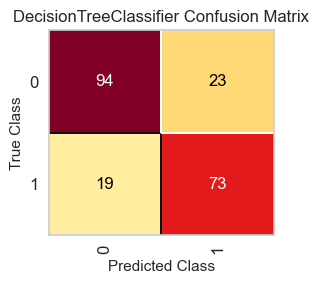

<AxesSubplot: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [25]:
fig, ax = plt.subplots(figsize=(3,3))
cm = ConfusionMatrix(decision_tree , classes = decision_tree.classes_ ,)
cm.score(x_test, y_test)
cm.poof()

In [26]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,Y_pred))

Mean Squared Error: 0.20095693779904306


In [27]:
trag_names = ['Dead (0)', 'Survived (1)'] # 0 - Dead, 1 - Survived

In [28]:
print(metrics.classification_report(y_test,Y_pred, target_names=trag_names, digits=3))

              precision    recall  f1-score   support

    Dead (0)      0.832     0.803     0.817       117
Survived (1)      0.760     0.793     0.777        92

    accuracy                          0.799       209
   macro avg      0.796     0.798     0.797       209
weighted avg      0.800     0.799     0.799       209



In [29]:
feat_names = x_test.columns

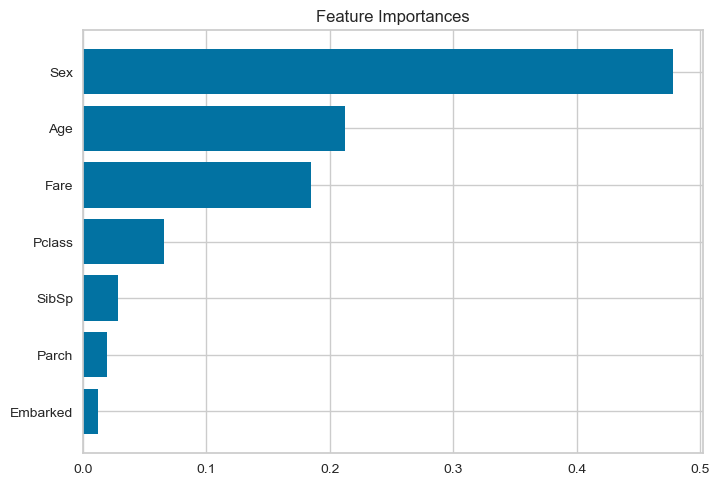

In [30]:
importances = decision_tree.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feat_names[i] for i in indices])
plt.show()